# Imbalanced Data 불균형 데이터
데이터를 분류할 때 기본적으로 데이터의 분포를 확인하게 된다. 이 때 예측해야하는 결과값의 분포가 20:1 에서부터 심하면 400:1 혹은 그 이상까지 매우 불균형하게 분포되어 있는 경우가 많다. 이러한 데이터의 균형을 맞춰주는 작업을 생략하게 되면 데이터의 양이 많은 측으로 과적합된 결과를 얻을 확률이 높아진다. 따라서 해당 문제를 해결한 이후에 분류 및 예측 작업을 시행하여야 한다.

## 1. Definition 정의
Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

불균형 데이터라는 것은 목표 클래스의 숫자가 불균형한 관측치를 가지고 있는 데이터셋들을 이르는 말이다. 즉 한 클래스 레이블은 매우 높은 관측치를 가지고 있고 다른 것들은 낮은 관측치를 가지고 있는 것이다.(거꾸로도 해당함)

## 2. Problem 문제

### 2.1 Overfitting 과적합

기본적으로 과적합은 많은 변수 설정, 딥러닝에서의 학습률(Learning Rate) 과다로 인한 오버슈팅 등 다양한 상황에서 발생한다. 여기서는 데이터의 불균형에서 오는 과적합을 설명한다.

불균형 데이터에서 오는 과적합은 모델이 분포도가 높은 분류에 가중치를 주면 자연스레 예측률이 높아지는 데서 기인한다. $A:B = 20:80$ 으로 분포된 데이터가 있다면 전부 다 $B$ 클래스로 분류하면 최소한 80%의 정확도를 얻을수 있다는 것이 예시가 된다. 이것이 $B$의 분류를 예측하는 문제라면 아무 문제가 없겠지만 $B$를 이런 방식으로 분류해내는 것은 굳이 수리적 모델을 필요로 하지 않는 것이 자명하다. 즉 이런 문제가 생기는 이유는 해당 상황에서 둘 다 잘 분류해내고 싶거나, 분포가 적은 클래스를 정확하게 분류해내고 싶은 것이다.

게임 유저에 관하여 해당 문제를 적용하자면 무과금 유저와 과금 유저 분류 및 예측, 소과금 유저와 핵과금 유저 분류 및 예측 등이 중요한 문제가 된다. 무과금 유저에서 과금 유저군과 비슷한 특성을 지닌 유저들을 마케팅하여 과금 유저로 전환하는 것과 마찬가지로 소과금 유저의 핵과금 유저로의 전환이 매출엔 필수적이기 때문이다. 두 가지 케이스 모두 후자에 속한 유저의 수는 구조적으로 전자에 비해 적을 가능성이 매우 높다. 가정하지 않는 상황으로는 게임에 과금 유저 밖에 없게된 경우는 구독형 패키지 게임이거나, 패스형태의 구독이 강제되는 게임들 등 혹은 게임에 모종의 이유로 현재 있는 과금 유저외에 무과금 유저 및 신규 유저 유입이 차단된 경우 정도가 있을 수 있다. 앞 두가지는 다른 차원의 분석이 필요하고 마지막과 같은 경우는 PLC 분석이 더 필요할 것이다.

레벨, 전투력으로 stratified

## 3. Solution 해결책
언더샘플링(Under Sampling), 오버샘플링(Over Sampling), 데이터 증가(Data Augmentation) 정도의 해결방법이 존재한다. 데이터 증가는 여기에 적합하지 않을 수 있는 예시이지만 이미지 분야에서 쓰이는 해결책이다.

### 3.1 Under Sampling(Down Sampling) 
 언더샘플링은 다운샘플링이라고도 불리며 과다분포된 클래스 데이터에서 과소분포된 클래스 데이터의 양만큼 클래스 데이터를 샘플링하여 데이터 균형을 맞춰주는 작업이다. 장점으로는 데이터의 불균형을 쉽게 해결하고 유의미한 데이터를 남길 수 있다. 단점으로는 엄연히 존재하는 데이터에 존재하는 정보는 유실될 수 밖에 없다는 점이다.

#### 3.1.1 Random Under Sampling

In [ ]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
# 사이킷런 서브모듈 -> imblearn, imbalanced learn 체크 필요함
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# 사이킷런 서포트벡터머신
from sklearn import svm

In [ ]:

## Random Data Generation
n0 = 200; n1 = 20
# seed 고정 필요
rv1 = stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]]) # ([x,y], [[var(x), cov(x,y)],[cov(y,x), var(y)]]) , (mean vector, covariance matrix)
# seed 고정 필요
rv2 = stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)  # rvs : random variable sample, (개수, random_state : seed)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1]) # vstack : vertical stack, matrix라 방향이 중요
y_imb = np.hstack([np.zeros(n0), np.ones(n1)]) #np.zeros : 0을  n0개 만큼 채운 리스트, np.ones 1을 n1개 만큼 채운 리스트, hstack horizontal stack : 옆으로 이어 붙이기(scalar 라 가능)

In [ ]:
x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)    # np.linspce : array_generation, (start, stop, # of array = 50 by default)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)  # np.meshgrid : broadcasting grid 탐색과 비슷

In [ ]:
X1

array([[-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       ...,
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ],
       [-4.        , -3.99199199, -3.98398398, ...,  3.98398398,
         3.99199199,  4.        ]])

In [ ]:
X2

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.995996  , -1.995996  , -1.995996  , ..., -1.995996  ,
        -1.995996  , -1.995996  ],
       [-1.99199199, -1.99199199, -1.99199199, ..., -1.99199199,
        -1.99199199, -1.99199199],
       ...,
       [ 1.99199199,  1.99199199,  1.99199199, ...,  1.99199199,
         1.99199199,  1.99199199],
       [ 1.995996  ,  1.995996  ,  1.995996  , ...,  1.995996  ,
         1.995996  ,  1.995996  ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

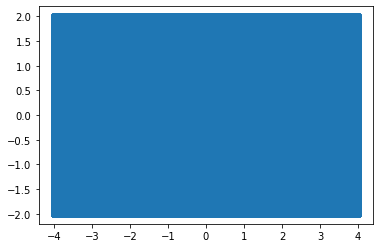

In [ ]:
plt.scatter(X1,X2)

In [ ]:
plt.show()

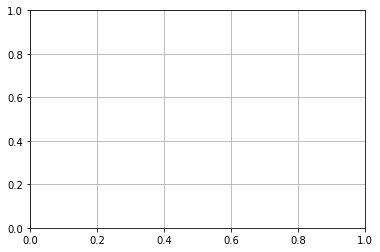

In [ ]:
plt.grid()

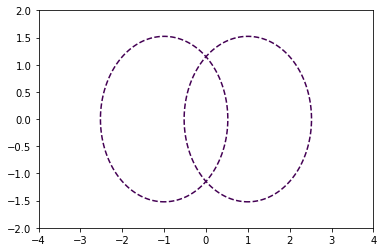

In [ ]:
plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

In [ ]:
def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = svm.SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

SVC(C=10000.0, kernel='linear', random_state=0)

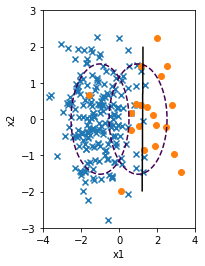

In [ ]:
plt.subplot(121)
classification_result2(X_imb, y_imb)

In [ ]:
temp_model = RandomUnderSampler(random_state=0, replacement=False) # replacement - True : 복원, False : 비복원
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)

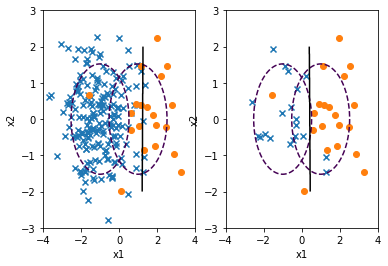

In [ ]:
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

#### 3.1.2 Tomek Link

#### 3.1.3 CNN(Condensed Nearest Neighbour) 

#### 3.1.4 Edited Nearest Neighbour

### 3.2 Over Sampling

#### 3.2.1 Random Oversampling

### 3.3 Data Augumentaion



#### 3.3.1
---

## 문제



## Reference
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/


https://shinminyong.tistory.com/34


https://www.tensorflow.org/tutorials/structured_data/imbalanced_data


https://ratsgo.github.io/insight-notes/docs/qa/augmentation


https://techblog-history-younghunjo1.tistory.com/74